# Chapter 2 - Data and Sampling Distributions

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

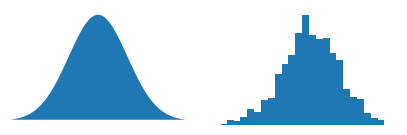

In [3]:
np.random.seed(seed=1)               # Set the random seed to ensure reproducibility of random numbers

x = np.linspace(-3, 3, 300)          # Generate 300 evenly spaced values between -3 and 3 for the x-axis
xsample = stats.norm.rvs(size=1000)  # Generate 1000 random samples from a normal distribution

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))  # Create a figure with 2 columns of subplots, size is 5x1.5 inches

# Plot the first subplot
ax = axes[0]
ax.fill(x, stats.norm.pdf(x))  # Fill under the normal distribution curve (probability density function)
ax.set_axis_off()              # Turn off the axis for a cleaner appearance
ax.set_xlim(-3, 3)             # Set x-axis limits from -3 to 3

# Plot the second subplot
ax = axes[1]
ax.hist(xsample, bins=30)  # Create a histogram of the xsample data with 30 bins
ax.set_axis_off()          # Turn off the axis for a cleaner appearance
ax.set_xlim(-3, 3)         # Set x-axis limits from -3 to 3

plt.show()  # Display the plots

#### Loans Income

In [5]:
url1 = ('https://raw.githubusercontent.com/arvindbetrabet/Practical_Statistics_for_Data_Scientists/refs/heads/master/data/loans_income.csv')

# If the CSV contains only one column, .squeeze('columns') will convert the DataFrame into a pandas Series.
loans_income = pd.read_csv(url1).squeeze('columns')

loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [6]:
len(loans_income)

50000

In [7]:
sample_data = pd.DataFrame({  
    'income': loans_income.sample(1000),  # Take a random sample of 1000 values from loans_income
    'type': 'Data',                       # Assign the label 'Data' to indicate original sample
})

sample_mean_05 = pd.DataFrame({  
    'income': [loans_income.sample(5).mean() for _ in range(1000)],  # Calculate the mean of random samples of 5, repeated 1000 times
    'type': 'Mean of 5',                                             # Assign the label 'Mean of 5' to indicate sample mean taken from 5 values
})

sample_mean_20 = pd.DataFrame({  
    'income': [loans_income.sample(20).mean() for _ in range(1000)],  # Calculate the mean of random samples of 20, repeated 1000 times
    'type': 'Mean of 20',                                             # Assign the label 'Mean of 20' to indicate sample mean taken from 20 values
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])  # Concatenate all three DataFrames into one
print(results.head())                                               # Print the first few rows of the combined DataFrame

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


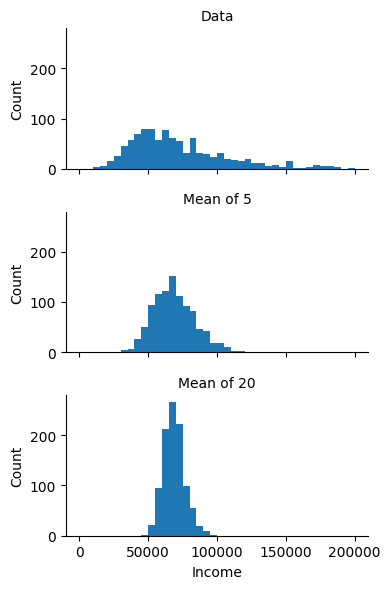

In [8]:
g = sns.FacetGrid(results,             # Create a FacetGrid for visualizing different subsets of the data
                  col='type',          # Facet the grid by the 'type' column ('Data', 'Mean of 5', 'Mean of 20')
                  col_wrap=1,          # Arrange facets in a single column
                  height=2,            # Set the height of each subplot to 2 inches
                  aspect=2)            # Set the aspect ratio of each subplot to make them twice as wide as tall

g.map(plt.hist,                        # Map a histogram to each facet
      'income',                        # Plot the 'income' variable
      range=[0, 200000],               # Set the range for the x-axis (income) from 0 to 200,000
      bins=40)                         # Divide the range into 40 bins for the histogram

g.set_axis_labels('Income', 'Count')   # Set labels for the x and y axes
g.set_titles('{col_name}')             # Set titles for each facet using the 'type' column values

plt.tight_layout()                     # Adjust the layout to ensure there is no overlap between plot elements
plt.show()                             # Display the plots

## Central Limit Theorem

 *It says thatthe means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population isnot normally distributed*, provided that the sample size is large enough and thedeparture of the data from normality is not too great. The central limit theoremallows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference—that is, confidence intervals and hypothesistests.

## The Bootstrap

In [11]:
results = []                                 # Initialize an empty list to store bootstrap results

for nrepeat in range(1000):                  # Repeat the process 1000 times for bootstrapping
    sample = resample(loans_income)          # Draw a random sample (with replacement) from loans_income
    results.append(sample.median())          # Calculate the median of the sample and append it to results

results = pd.Series(results)                 # Convert the results list to a pandas Series for easier calculations

# Print a heading for the output statistics
print('==== Bootstrap Statistics ====\n')

# Print the original median of the loans_income data
print(f'original: {loans_income.median()}')  

# Calculate and print the bias (difference between mean of bootstrap samples and original median)
print(f'bias: {results.mean() - loans_income.median()}')  

# Calculate and print the standard error (standard deviation of bootstrap results)
print(f'std. error: {results.std()}')        

==== Bootstrap Statistics ====

original: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830748


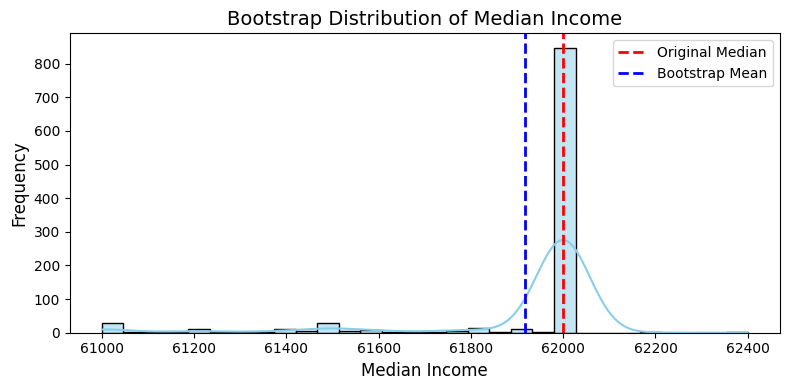

In [12]:
# Convert results to a pandas Series if not already
results = pd.Series(results)  # Assuming 'results' contains medians from bootstrap samples

# Plot the bootstrap medians
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(results, kde=True, ax=ax, bins=30, color='skyblue')  # Plot histogram with kernel density estimate

# Add labels and title
ax.set_xlabel('Median Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Bootstrap Distribution of Median Income', fontsize=14)

# Add lines for the original median and the mean of bootstrap medians
ax.axvline(x=loans_income.median(), color='red', linestyle='--', linewidth=2, label='Original Median')
ax.axvline(x=results.mean(), color='blue', linestyle='--', linewidth=2, label='Bootstrap Mean')

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Confidence Intervals

Given a sample of size n, and a sample statistic of interest, the algorithm for a boot‐
strap confidence interval is as follows:

1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

   Mean of the original dataset: 68760.51844
Mean of the sample of 20 values: 55734.1


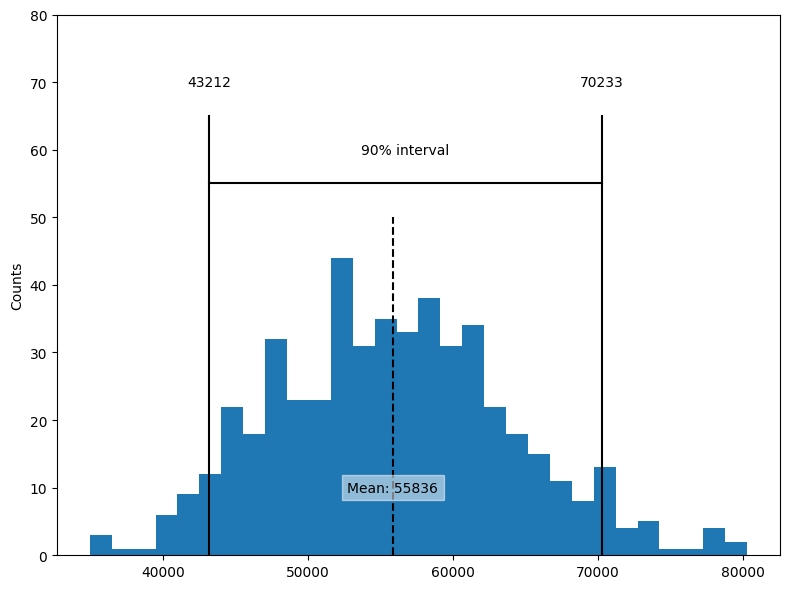

In [15]:
# Print the mean of loans_income dataset
print("   Mean of the original dataset:", loans_income.mean())  

np.random.seed(seed=3)  # Set seed for reproducibility

# Create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)    # Resample 20 data points without replacement from loans_income
print("Mean of the sample of 20 values:",sample20.mean())         # Print the mean of the sampled data

# Bootstrap process for 500 repetitions
results = []                       # Initialize an empty list to store bootstrap results
for nrepeat in range(500):         # Loop to perform 500 bootstrap samples
    sample = resample(sample20)    # Resample from sample20 with replacement
    results.append(sample.mean())  # Append mean of the resampled data to results
results = pd.Series(results)       # Convert results list to a pandas Series

# Calculate 90% confidence interval (5th and 95th percentiles)
confidence_interval = list(results.quantile([0.05, 0.95]))  # Get the 5th and 95th percentiles as the confidence interval

# Plot histogram of bootstrap means
ax = results.plot.hist(bins=30, figsize=(8, 6))            # Plot histogram of bootstrap means with 30 bins
ax.plot(confidence_interval, [55, 55], color='black')      # Plot horizontal line at y=55 for confidence interval

# Plot vertical lines for confidence interval bounds
for x in confidence_interval:                                                             # Loop through the confidence interval bounds
    ax.plot([x, x], [0, 65], color='black')                                               # Plot vertical lines for lower and upper confidence bounds
    ax.text(x, 70, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')  # Annotate the confidence bounds

# Add label for the 90% confidence interval
ax.text(sum(confidence_interval) / 2, 60, '90% interval',  # Annotate the middle of the confidence interval
        horizontalalignment='center', verticalalignment='center')

# Plot mean line of bootstrap results
meanIncome = results.mean()  # Calculate the mean of the bootstrap results
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')  # Plot a dashed line for the mean of bootstrap results
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',                         # Annotate the mean line
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# Set y-axis limit and label
ax.set_ylim(0, 80)       # Set the limit for y-axis from 0 to 80
ax.set_ylabel('Counts')  # Set label for y-axis

plt.tight_layout()       # Adjust layout to prevent overlap
plt.show()               # Display the plot

*The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters.* 

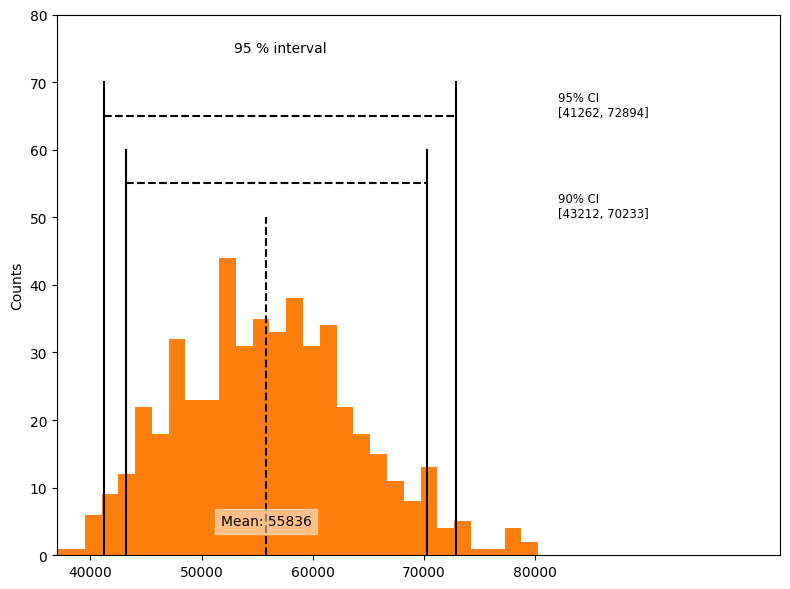

In [17]:
np.random.seed(seed=3)  # Set seed for reproducibility

# Create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)  # Resample 20 data points without replacement from loans_income

# Bootstrap process for 500 repetitions
results = []                       # Initialize an empty list to store bootstrap results
for nrepeat in range(500):         # Loop to perform 500 bootstrap samples
    sample = resample(sample20)    # Resample from sample20 with replacement
    results.append(sample.mean())  # Append mean of the resampled data to results
results = pd.Series(results)       # Convert results list to a pandas Series

# Calculate 90% confidence interval (5th and 95th percentiles)
confidence_interval = list(results.quantile([0.05, 0.95]))             # Get the 5th and 95th percentiles as the confidence interval

# Plot histogram of bootstrap means (90% confidence interval)
fig, ax = plt.subplots(figsize=(8, 6))                                 # Create figure and axis for plot
ax.hist(results, bins=30, color='C1')                                  # Plot histogram of bootstrap means with 30 bins and color 'C1'
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')  # Plot horizontal line at y=55 for confidence interval
for x in confidence_interval:                                          # Loop through the confidence interval bounds
    ax.plot([x, x], [0, 60], color='black')                            # Plot vertical lines for lower and upper confidence bounds
    
ax.text(82000, 50, f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',  # Annotate the 90% confidence interval
        fontsize='small')

# Calculate 95% confidence interval (2.5th and 97.5th percentiles)
confidence_interval = list(results.quantile([0.025, 0.975]))           # Get the 2.5th and 97.5th percentiles as the confidence interval

ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')  # Plot horizontal line at y=65 for confidence interval

for x in confidence_interval:                                          # Loop through the confidence interval bounds
    ax.plot([x, x], [0, 70], color='black')                            # Plot vertical lines for lower and upper confidence bounds
    
ax.text(82000, 65, f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',  # Annotate the 95% confidence interval
        fontsize='small')

ax.text(sum(confidence_interval) / 2, 75, '95 % interval',             # Annotate the middle of the 95% confidence interval
        horizontalalignment='center', verticalalignment='center')

# Plot mean line of bootstrap results
meanIncome = results.mean()                                                # Calculate the mean of the bootstrap results
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')  # Plot a dashed line for the mean of bootstrap results
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',                          # Annotate the mean line with the calculated mean
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),        # Add a background box to the text for better visibility
        horizontalalignment='center', verticalalignment='center')          # Align text to center horizontally and vertically

# Set y-axis and x-axis limits and labels
ax.set_ylim(0, 80)                                  # Set the limit for y-axis from 0 to 80
ax.set_xlim(37000, 102000)                          # Set the limit for x-axis from 37000 to 102000
ax.set_xticks([40000, 50000, 60000, 70000, 80000])  # Set specific x-axis tick positions
ax.set_ylabel('Counts')                             # Set label for y-axis

plt.tight_layout()  # Adjust layout to remove excess white space
plt.show();         # Display the plot

# Normal Distribution

The utility of the normal distribution derives from the fact that many statistics are normally distributed in their sampling distribution.

### Standard Normal and QQ-Plots

*A QQ-Plot is used to visually determine how close a sample is to a specified distribution*—in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal. Figure bellow shows a QQ-Plot for a sample of 100 values randomly generated from a normal distribution; as expected, the points closely follow the line.

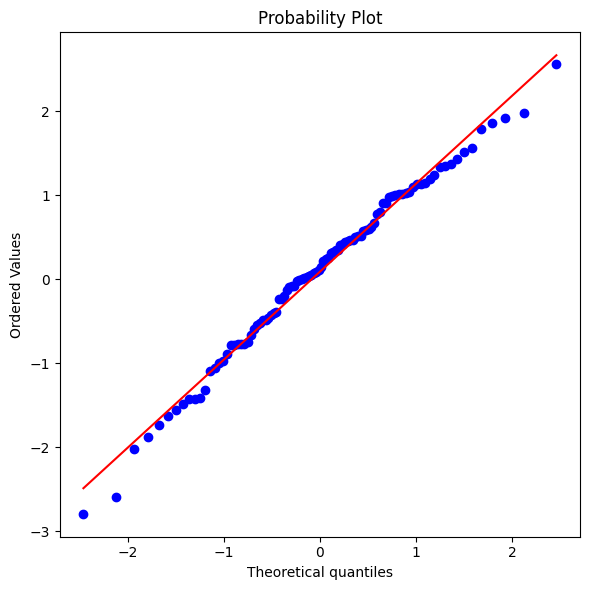

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))  # Create figure and axis with dimensions 4x4 inches

norm_sample = stats.norm.rvs(size=100)  # Generate 100 random samples from a normal distribution
stats.probplot(norm_sample, plot=ax)    # Create a Q-Q plot for the normal sample to check normality

plt.tight_layout()  # Adjust layout to remove excess white space
plt.show()          # Display the plot

Converting data to z-scores (i.e., standardizing or normalizing the data) does not make the data normally distributed. It just puts the data on the same scale as the standard normal distribution, often
for comparison purposes.

### Long-Tailed Distributions

In [22]:
# Read the CSV file from the .gz compressed file, specifying 'Unnamed: 0' as the index column
sp500_px = pd.read_csv('sp500_data.csv.gz', compression='gzip', index_col='Unnamed: 0')

# Display the first few rows of the DataFrame
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


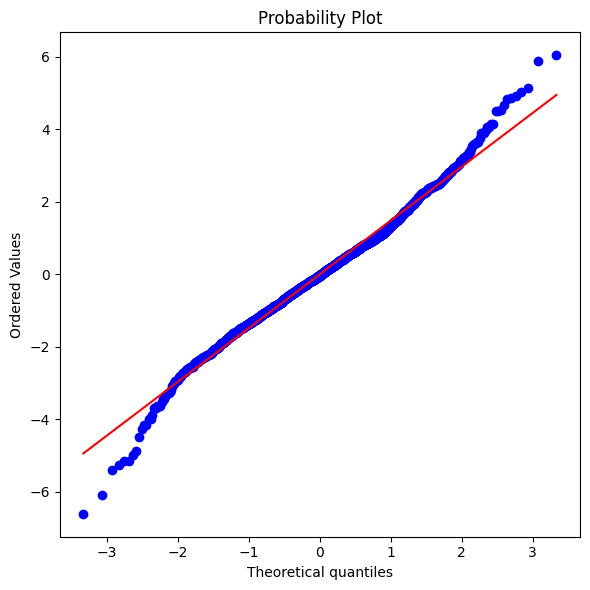

In [23]:
nflx = sp500_px['NFLX']                 # Extract the 'NFLX' column from the sp500_px DataFrame
nflx = np.diff(np.log(nflx[nflx > 0]))  # Calculate the log returns for NFLX by first taking the log of positive prices and then 
                                        # computing the differences

fig, ax = plt.subplots(figsize=(6, 6))  # Create a figure and axis with dimensions 4x4 inches
stats.probplot(nflx, plot=ax)           # Generate a Q-Q plot to check if the log returns are normally distributed

plt.tight_layout()  # Adjust layout to remove any excess white space around the plot
plt.show()          # Display the Q-Q plot

In contrast to the previous plot, the points are far below the line for low values and far above the line for high values, indicating the data are not normally distributed. This means that we are much more likely to observe extreme values than would be expected if the data had a normal distribution. The graphic above shows another common phenomenon: the points are close to the line for the data within one standard deviation of the mean. Tukey refers to this phenomenon as data being “*normal in the middle*” but having much longer tails.

#### Key Ideas

    • Most data is not normally distributed.
    • Assuming a normal distribution can lead to underestimation of extreme events (“black swans”).

# Student’s t-Distribution

The t-distribution’s accuracy in depicting the behavior of a sample statistic requires that the distribution of that statistic for that sample be shaped like a normal distribution. It turns out that **sample statistics are often normally distributed, even when the
underlying population data is not** (a fact which led to widespread application of the t-distribution). This brings us back to the phenomenon known as the central limit theorem.

# Binomial Distribution

If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

In [30]:
# Probability Mass Function (PMF) for a binomial distribution
print(stats.binom.pmf(0,
                      n=200,
                      p=0.02))

0.017587946605721567


Suppose you are a teacher overseeing a small group of 5 students (n = 5) preparing for a challenging quiz. Based on past performance and practice tests, you estimate that each student has a 10% chance (p = 0.1) of passing the quiz. You want to determine the probability that exactly 2 students (2) will pass the quiz.

In [32]:
# Calculates the probability of...
print(stats.binom.pmf(2,       # getting exactly 2 successes
                      n=5,     # in 5 trials
                      p=0.1))  # where the probability of success in each trial is 0.1

0.07289999999999992


Suppose you are a manager at a company running a customer feedback survey. You know that, on average, 2% of your customers (p = 0.02) who receive the survey actually fill it out and submit it. You sent out the survey to 200 customers (n = 200). Now, you want to know the probability that exactly 5 customers (number of successes = 5) will fill out the survey.

In [34]:
# Probability Mass Function (PMF) for a binomial distribution
print(stats.binom.pmf(5,
                      n=200,
                      p=0.02))

0.15787888557385002


Imagine you're running an ice cream shop. You have a new type of ice cream that customers can sample, and you've found that only 10% of people (p = 0.1) who try the sample decide to buy a full ice cream. On a given day, 5 people (n = 5) visit your shop and try the sample. You want to know the probability that at most 2 people (maximum number of successes = 2) will buy a full ice cream.

In [36]:
# The Cumulative Distribution Function (CDF) for a binomial distribution
print(stats.binom.cdf(2,       # the maximum number of successes.
                      n=5,     # the number of trials
                      p=0.1))  # the probability of success in each trial

0.99144


Determine the probability that at least 2 people buy the full ice cream, we need to calculate the cumulative probability for 2, 3, 4, and 5 people making a purchase.
In the binomial distribution, you can calculate the cumulative probability for at least 2 successes by subtracting the cumulative probability of less than 2 successes from 1:

In [38]:
# Probability of less than 2 successes (0 or 1 people buying the ice cream)
less_than_2 = stats.binom.cdf(1, n=5, p=0.1)

# Probability of at least 2 people buying the ice cream
at_least_2 = 1 - less_than_2

print(at_least_2)

0.08146000000000009


Imagine you are the manager of a store that sells electronic gadgets, and you want to understand the probability of different outcomes during customer visits to the store. Suppose you estimate that the probability that a customer makes a purchase during their visit is 15% (or 0.15). On a given day, 8 customers visit your store. If you want to know the probability that at most 3 customers make a purchase:

In [40]:
# The Cumulative Distribution Function (CDF) for a binomial distribution
print(stats.binom.cdf(3,
                      n=8,
                      p=0.15))

0.9786475298828125


# Poisson and Related Distribution

### Poisson Distributions


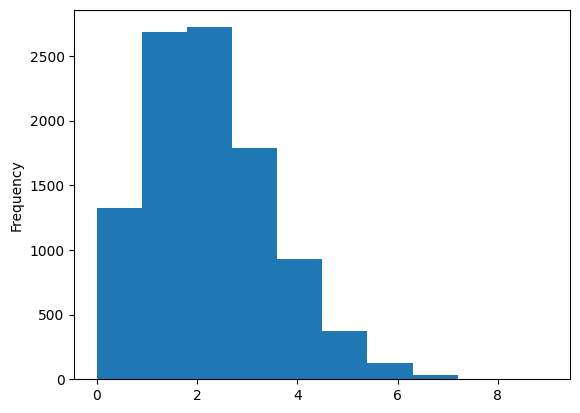

In [43]:
# Generate  from a Poisson distribution 
sample = stats.poisson.rvs(2,           # lambda = 2
                           size=10000)  # 10000 random values

 # Convert the sample to a pandas Series and plot it as a histogram
pd.Series(sample).plot.hist() 

plt.show()

### Exponential Distribution

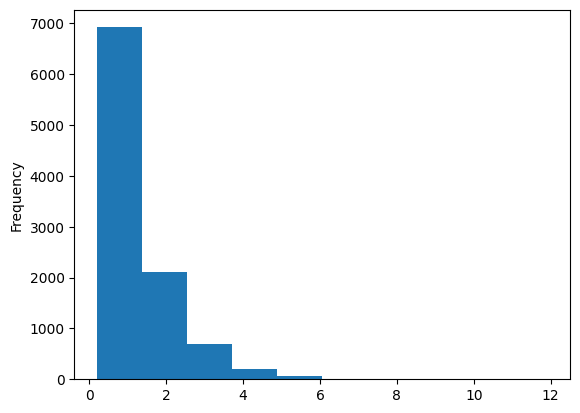

In [45]:
# Generate  from an exponential distribution
sample1 = stats.expon.rvs(0.2,         # rate (the number of events per time period) 
                          size=10000)  # 10,000 random values

# Convert the sample to a pandas Series and plot it as a histogram
pd.Series(sample1).plot.hist()

plt.show()

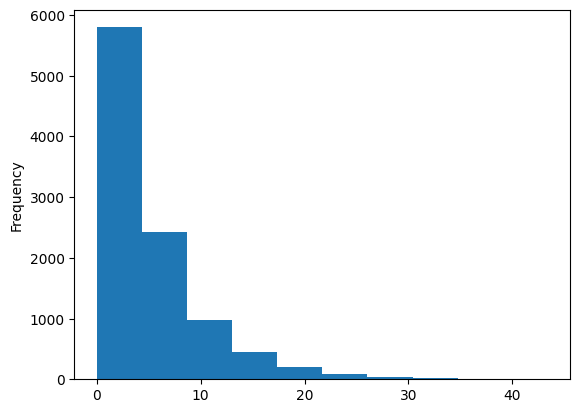

In [46]:
# Generate  from an exponential distribution
sample2 = stats.expon.rvs(scale=5,    # scale parameter of 5 (1/lambda )
                         size=10000)  # 10,000 random values

# Convert the sample to a pandas Series and plot it as a histogram
pd.Series(sample2).plot.hist()

plt.show()

### Weibull Distribution

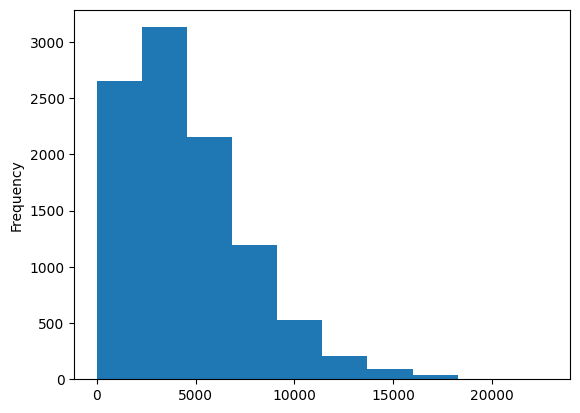

In [48]:
# Generate random values from a Weibull distribution
sample = stats.weibull_min.rvs(1.5,         # Shape parameter of 1.5
                               scale=5000,  # Scale parameter to 5000
                               size=10000)  # 10,000 random values

pd.Series(sample).plot.hist()  # Convert the generated values into a pandas Series and plot a histogram
plt.show()  

#### Key Ideas
    • For events that occur at a constant rate, the number of events per unit of time or space can be modeled as a Poisson distribution.
    • You can also model the time or distance between one event and the next as an exponential distribution.
    • A changing event rate over time (e.g., an increasing probability of device failure) can be modeled with the Weibull distribution.